# Details of ``torchdms`` models

Here we describe the different assumptions and formulations of sequence-phenotype models supported in this package.

## Notation
Consider a library of $N$ deep mutational scanning variants of a protein with $L$ sites, where functional scores for an arbitrary number of phenotypes (e.g., expression levels, ligand binding, antibody escape, etc.).
Lets define the following notation:

* Define the set of alphabet of mutations $m$ (i.e., amino acids, stops, and gaps) as $\mathcal{A}$, and $|\mathcal{A}| = M$ 
* Define a mutation $m$ such that $m \in \mathcal{A}$
* Given a variant $v$, we construct a binary representation of $v$ with respect to some wildtype sequence, $b(v) \in \mathbb{R^A}$, with element $b(v)_m$ equal to 1 if $v$ has mutation $m$ and 0 if $v$ has the wild type character.
* Define the mutational effect of the wildtype amino acid as $\beta_{wt}$
* Define the measured DMS functional score for phenotype $p$ as $y_{p}$

## Linear model

We can fit a linear model to DMS data to infer *latent/mutational effects* for each observed mutation, $\beta_m$.

To predict functional scores for phenotype $p$ of variant $v$, inferred mutational effects contribute additively:

$$ \widehat{y_p(v)} = \beta_{wt} + \sum_{m=1}^M \beta_m \cdot b_m(v) $$ 


## Fully connected model

### Global epistasis (GE) model

The GE modeling framework provides a more complex class of models that include a non-linear layer of units after the latent effects layer.

Define the latent phenotype for a variant $\phi(v)$ as:
$$\phi(v) =  \beta_{wt} + \sum_{m=1}^M \beta_{m} \cdot b_{m}(v) $$

Predictions for the observed phenotype $p(v)$ is a function of the latent phenotype:

$$\widehat{y(v)} = g(\phi(v)) $$

where $g$ is the global epistasis function.

### Generalized global epistasis (GGE) model

The GGE modeling framework provides the following extensions over the GE framework:
* Jointly model multiple phenotypes
* Learn a multi-dimensional latent space of mutational effects

Define the latent phenotype for a phenotype $p$ as
$$\phi_p(v) =  \beta_{p,wt} + \sum_{m=1}^M \beta_{p,m} \cdot b_{p,m}(v) $$

And predictions are obtained by applying a global epistasis function $g$ to *all* latent phenotypes:

$$\widehat{y_p(v)} = g(\phi_1(v), \phi_2(v), \cdots \phi_p(v)) $$

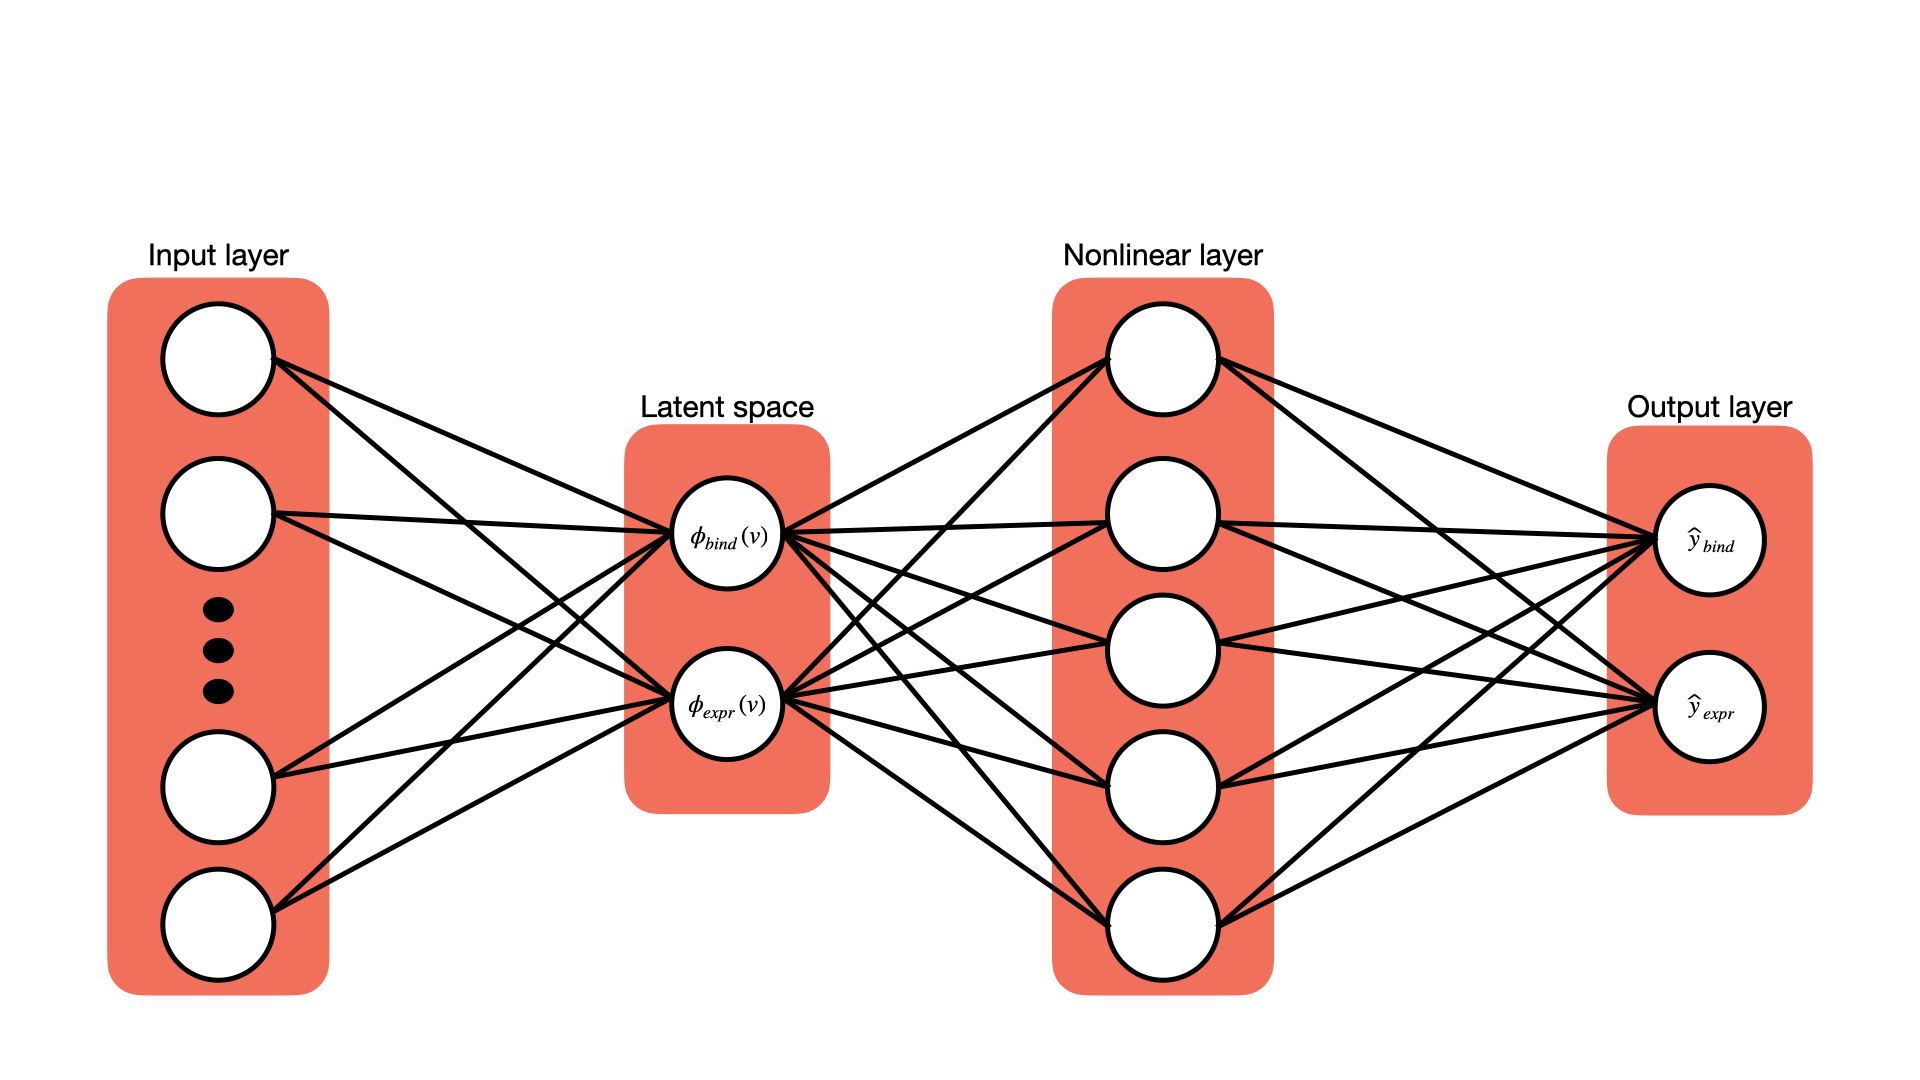

## Independent model

Independent models are meant to be fit to DMS data with measurements for two phenotypes.

*Note: Fitting two GE models is logically equivalent to fitting one Independent model.*

Predictions are obtained by applying seperate global epistasis functions to each latent phenotype:

$$\widehat{y_1(v)} = g_1(\phi_1(v)) $$
$$\widehat{y_2(v)} = g_2(\phi_2(v)) $$

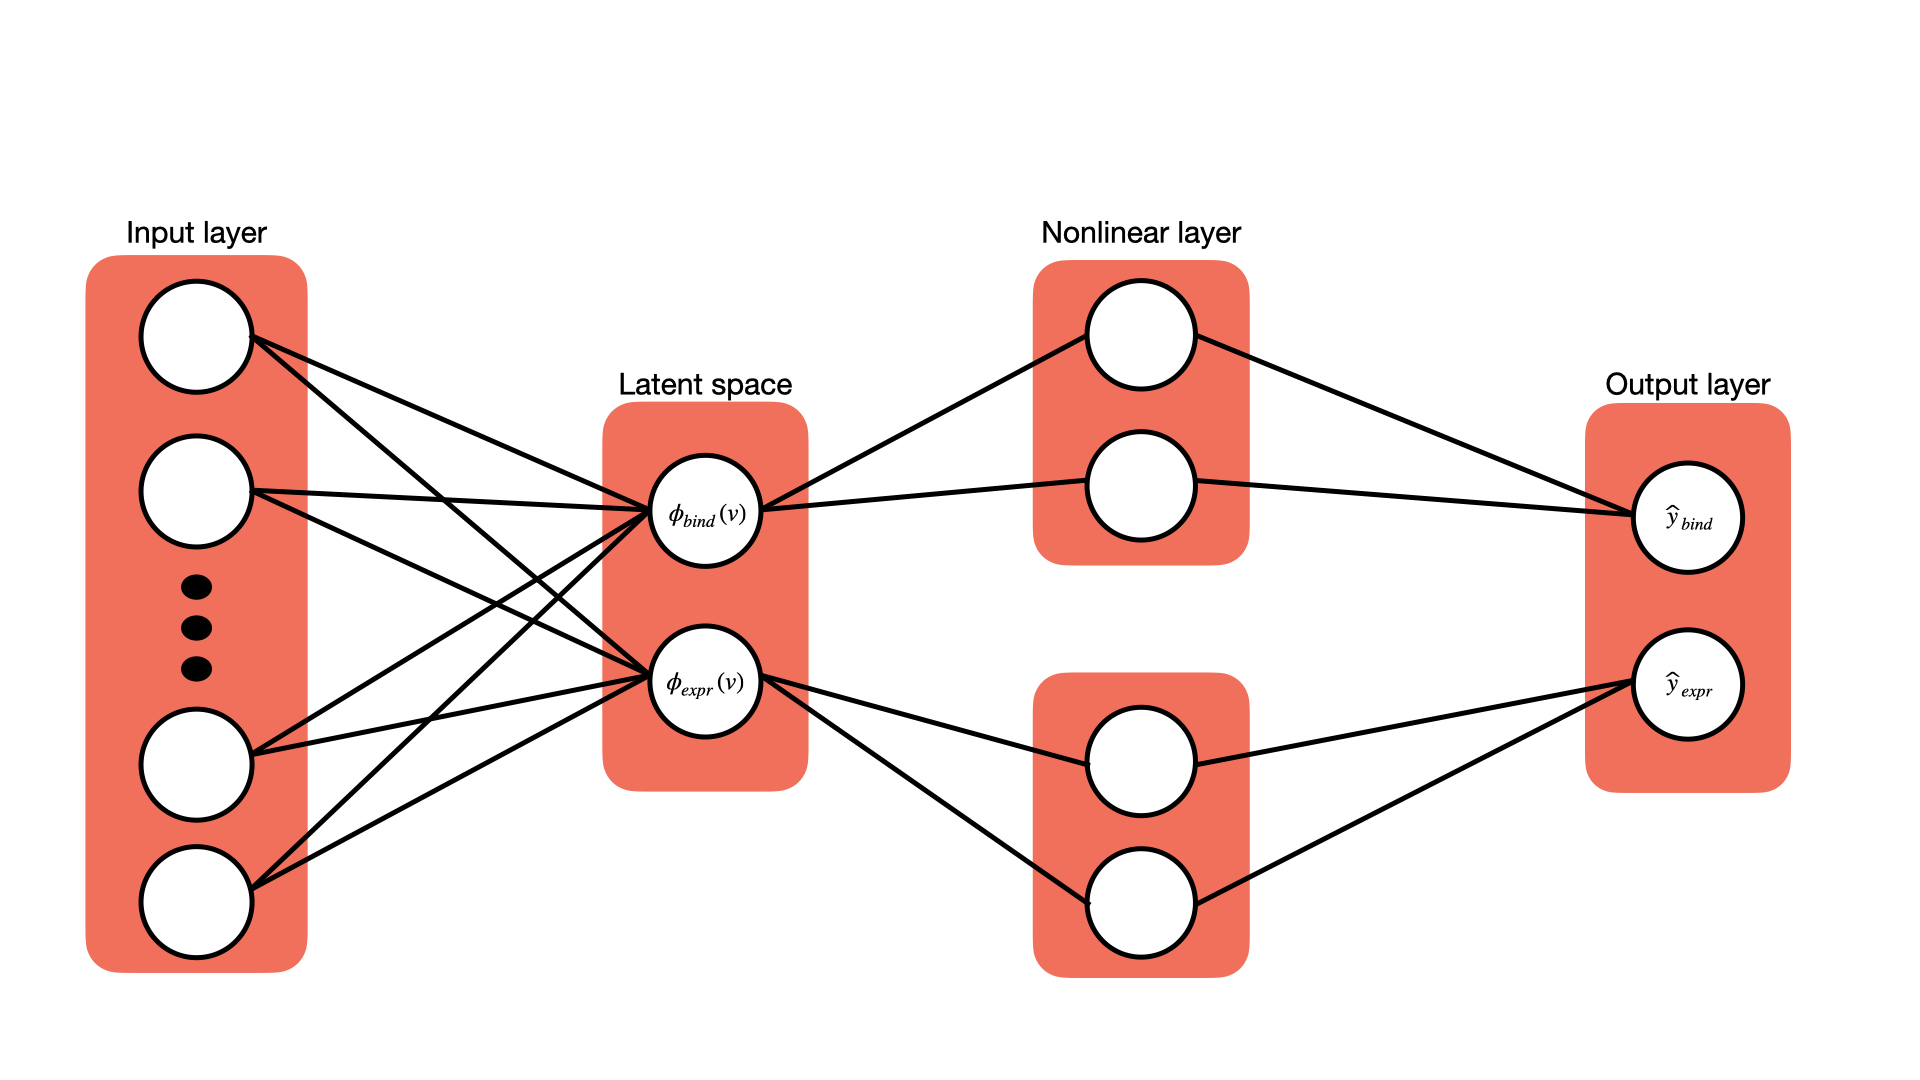

## Conditional model

A conditional model assumes that phenotype 1 is ligand binding (`bind`) and phenotype 2 is protein expression (`expr`) and that expression influences binding, but not the other way around.

Predictions are obtained with the following functions:
$$\widehat{y_{bind}(v)} = g_{bind}(\phi_{bind}(v), \phi_{expr}(v)) $$
$$\widehat{y_{expr}(v)} = g_{expr}(\phi_{expr}(v)) $$

To avoid errors on `bind` from influencing weights assocaited with `expr` during backpropgagation, we can use a `ConditionalSequential` model that trains all weights associated with `expr` first, then freezes them and uses them for `bind` predictions.

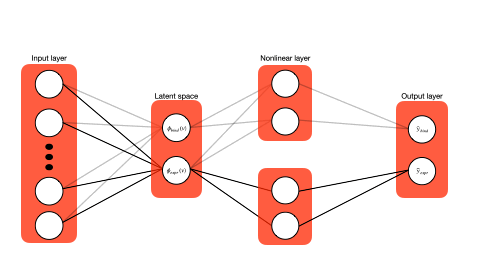